# 데이터 준비하기

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

# 필요한 라이브러리 가져오기
from PIL import Image
import os, glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [14]:

def convertImageSize(name):
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rcp_all/"+name
    print("이미지 디렉토리 경로: ", image_dir_path)

    images=glob.glob(image_dir_path + "/*.jpg")  

    img_size = 28
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(img_size,img_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

    print("{} 이미지 resize 완료!".format(name))

dirs = ['scissor_all','rock_all','paper_all','scissor_test','rock_test','paper_test']
for c in dirs:
    convertImageSize(c)

이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rcp_all/scissor_all
scissor_all 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rcp_all/rock_all
rock_all 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rcp_all/paper_all
paper_all 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rcp_all/scissor_test
scissor_test 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rcp_all/rock_test
rock_test 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel0042/aiffel/rock_scissor_paper/rcp_all/paper_test
paper_test 이미지 resize 완료!


## 데이터 전부 불러오고, ~~train/test 데이터 분리~~
[데이터 분리 참조](https://rfriend.tistory.com/519)

앞서 언급한대로, 분리는 진행하지 않고, 별도의 test 데이터( 슬랙에 올라온 다른 분의 데이터) 를 사용한다.

In [15]:
def load_data(isTest,img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2100*3   # 데이터는 2100개씩 있음
    if(isTest):
        number_of_data= 100 * 3
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    suffix = 'all'
    if(isTest):
        suffix = 'test'
        
    for file in glob.iglob(img_path+'/scissor_{}/*.jpg'.format(suffix)):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_{}/*.jpg'.format(suffix)):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper_{}/*.jpg'.format(suffix)):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("{} 이미지 개수는".format(suffix),idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rcp_all/"
(x_train, y_train)=load_data(False,image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

(x_test, y_test)=load_data(True,image_dir_path)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


## train,test 구분하여 사용할 때 사용하였음
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x_whole,y_whole, test_size=0.1, shuffle=True, random_state=500)
# print("x_train shape: {}".format(x_train.shape))
# print("x_test shape: {}".format(x_test.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("y_test shape: {}".format(y_test.shape))
# x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
# x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


all 이미지 개수는 6300 입니다.
x_train shape: (6300, 28, 28, 3)
y_train shape: (6300,)
test 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


# 이미지 살펴보기

라벨:  2


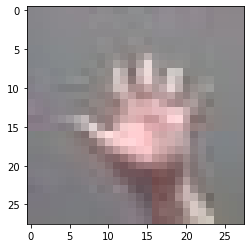

In [17]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[601])
# print('라벨: ', y_train[601])
plt.imshow(x_test[201])
print('라벨: ', y_test[201])


# 딥러닝 네트워크 설계하기

In [18]:
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

n_image_channel = 3
n_classes = 3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,n_image_channel)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_classes, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_43 (Dense)             

# 딥러닝 네트워크 학습시키기

In [19]:
# 모델 훈련
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
197/197 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.6841
Epoch 2/20
197/197 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8737
Epoch 3/20
197/197 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9368
Epoch 4/20
197/197 [==============================] - 0s 1ms/step - loss: 0.1128 - accuracy: 0.9648
Epoch 5/20
197/197 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9795
Epoch 6/20
197/197 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9851
Epoch 7/20
197/197 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9930
Epoch 8/20
197/197 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9951
Epoch 9/20
197/197 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9960
Epoch 10/20
197/197 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9981

# 테스트
테스트 데이터는 이미 만들어져 있음

In [20]:
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


## loss, accuracy 측정

In [21]:

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=3  #4번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 - 0s - loss: 1.4979 - accuracy: 0.7333
test_loss: 1.4978870153427124 
test_accuracy: 0.7333333492279053
model.predict() 결과 :  [1.4432995e-03 9.9792081e-01 6.3597754e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


# 더 좋은 네트워크 만들어보기

In [23]:
n_channel_1= 64
n_channel_2= 128
n_dense= 128
n_train_epoch= 20

n_image_channel = 3
n_classes = 3
# 모델 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,n_image_channel)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_classes, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 모델 훈련
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("===================== result ================== ")
print("n_channel_1: {}".format(n_channel_1))
print("n_channel_2: {}".format(n_channel_2))
print("n_dense: {}".format(n_dense))
print("n_train_epoch: {}".format(n_train_epoch))

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


# predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
# predicted_labels = np.argmax(predicted_result, axis=1)

# idx=3  #4번째 x_test를 살펴보자. 
# print('model.predict() 결과 : ', predicted_result[idx])
# print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
# print('실제 데이터의 라벨 : ', y_test[idx])

Model에 추가된 Layer 개수:  8
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_46 (Dense)             

# 가장 높은 정확도 결과

n_channel_1: 64    
n_channel_2: 128     
n_dense: 128    
n_train_epoch: 20    
test_loss: 1.3294609785079956     
test_accuracy: 0.7566666603088379